In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
import datetime as dt

### Reading data and checking first 5 rows:

* year    
* artist
* track
* time
* date.entered
* wk1 


In [2]:
b_b_data = pd.read_csv('billboard.csv')
b_b_data.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Getting to know the data by info() command

In [3]:
b_b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
year            317 non-null int64
artist          317 non-null object
track           317 non-null object
time            317 non-null object
date.entered    317 non-null object
wk1             317 non-null int64
wk2             312 non-null float64
wk3             307 non-null float64
wk4             300 non-null float64
wk5             292 non-null float64
wk6             280 non-null float64
wk7             269 non-null float64
wk8             260 non-null float64
wk9             253 non-null float64
wk10            244 non-null float64
wk11            236 non-null float64
wk12            222 non-null float64
wk13            210 non-null float64
wk14            204 non-null float64
wk15            197 non-null float64
wk16            182 non-null float64
wk17            177 non-null float64
wk18            166 non-null float64
wk19            156 non-null float64
wk20           

#### conclusion:
* I can conclude that there are 317 rows and 81 columns
* I can see that missing values start from column wk2 and the number of them is increasing
* Column wk1 is int type but rest are float
* from wk 66 onwards all are nan values


### Droping all colums that has only nan values

In [4]:
b_b_data = b_b_data.dropna(axis=1,how='all')
b_b_data.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65'],
      dtype='object')

### From sumarizing all colums I can conclude that there are 228 unique artists, all data comes from year 2000


In [5]:
b_b_data =b_b_data.melt(id_vars=['year','artist','track','time','date.entered'],
               var_name="week",value_name="rank",) 
b_b_data.head()

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


In [6]:
b_b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20605 entries, 0 to 20604
Data columns (total 7 columns):
year            20605 non-null int64
artist          20605 non-null object
track           20605 non-null object
time            20605 non-null object
date.entered    20605 non-null object
week            20605 non-null object
rank            5307 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


#### conclusion
Now we only have nan values in the column rank, all the other columns have no nan values


### Removing the 'wk' from the whole column and convert the numbers to int


In [7]:
b_b_data.week =b_b_data.week.str.replace('wk','')
b_b_data.head()

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0


### Droping the week,date.entered column
Year column can be droped since all are 2000 and this way has no information in it

In [8]:
b_b_data.drop(['year'],axis = 1, inplace = True)

In [9]:
b_b_data.dtypes

artist           object
track            object
time             object
date.entered     object
week             object
rank            float64
dtype: object

### Converting the column 'date.entered' as date


In [10]:
b_b_data['date.entered'] = pd.to_datetime(b_b_data['date.entered'])
b_b_data['date.entered'].astype

<bound method NDFrame.astype of 0       2000-02-26
1       2000-09-02
2       2000-04-08
3       2000-10-21
4       2000-04-15
           ...    
20600   2000-04-29
20601   2000-04-01
20602   2000-03-18
20603   2000-09-02
20604   2000-04-29
Name: date.entered, Length: 20605, dtype: datetime64[ns]>

In [11]:
b_b_data.rename(columns = {'date.entered':'date'},inplace = True)
b_b_data.set_index(['date'],inplace = True)
b_b_data.head()

,artist,track,time,week,rank
date,,,,,
2000-02-26,2 Pac,Baby Don't Cry (Keep...,4:22,1,87.0
2000-09-02,2Ge+her,The Hardest Part Of ...,3:15,1,91.0
2000-04-08,3 Doors Down,Kryptonite,3:53,1,81.0
2000-10-21,3 Doors Down,Loser,4:24,1,76.0
2000-04-15,504 Boyz,Wobble Wobble,3:35,1,57.0


In [12]:
new_data =  b_b_data.groupby(['track']).describe()['rank']
new_data.head()

,count,mean,std,min,25%,50%,75%,max
track,,,,,,,,
(Hot S**t) Country G...,34.0,30.882353,26.110215,7.0,12.0,23.0,36.75,100.0
3 Little Words,9.0,94.444444,4.065437,89.0,90.0,97.0,97.00,99.0
911,19.0,60.000000,16.872068,38.0,46.0,61.0,71.00,96.0
A Country Boy Can Su...,3.0,86.666667,10.115994,75.0,83.5,92.0,92.50,93.0
A Little Gasoline,6.0,89.833333,9.907909,75.0,83.5,92.0,98.25,99.0


In [13]:
new_data2 =  b_b_data.groupby(['artist']).describe()['rank']
new_data2.head()

,count,mean,std,min,25%,50%,75%,max
artist,,,,,,,,
2 Pac,7.0,85.428571,9.360505,72.0,79.5,87.0,90.50,99.0
2Ge+her,3.0,90.000000,2.645751,87.0,89.0,91.0,91.50,92.0
3 Doors Down,73.0,37.602740,26.603435,3.0,12.0,42.0,62.00,81.0
504 Boyz,18.0,56.222222,25.220336,17.0,34.5,57.0,75.75,96.0
98^0,20.0,37.650000,29.875663,2.0,16.0,31.5,54.75,94.0


### Getting the track and the artist what stayed the longest periode in billboard is the one that has the maximum count

In [14]:
new_data['count'].idxmax()

'Higher'

In [15]:
new_data2['count'].idxmax()

'Creed'

### Similary the shortest periode

In [16]:
new_data['count'].idxmin()

'Cherchez LaGhost'

In [17]:
new_data2['count'].idxmin()

'Estefan, Gloria'

### The song and the artist with the best ranking:

In [18]:
new_data['min'].idxmin()

'Amazed'

In [19]:
new_data2['min'].idxmin()

'Aaliyah'

### The song and the artist with worst ranking

In [20]:
new_data['min'].idxmax()

"Freakin' It"

In [21]:
new_data2['min'].idxmax()

'Fragma'

#### The song and the artist that stayed the longest time in the board

In [22]:
new_data['std'].idxmax()

'Auld Lang Syne (The ...'

In [23]:
new_data2['std'].idxmax()

'Kenny G'

In [24]:
b_b_data.sort_values('rank',ascending=False)

,artist,track,time,week,rank
date,,,,,
2000-06-17,"Houston, Whitney",Could I Have This Ki...,3:54,18,100.0
2000-11-04,Eminem,Stan,5:26,15,100.0
2000-08-12,Lil' Mo,Ta Da,4:17,5,100.0
2000-03-18,"Herndon, Ty",No Mercy,4:43,1,100.0
1999-12-04,Limp Bizkit,Re-Arranged,4:08,18,100.0
...,...,...,...,...,...
2000-04-29,Yankee Grey,Another Nine Minutes,3:10,65,NaN
2000-04-01,"Yearwood, Trisha",Real Live Woman,3:55,65,NaN
2000-03-18,Ying Yang Twins,Whistle While You Tw...,4:19,65,NaN


#### Getting information about the longest song

In [25]:
b_b_data.sort_values('time',ascending=False)[0:1]

,artist,track,time,week,rank
date,,,,,
1999-12-25,Kenny G,Auld Lang Syne (The ...,7:50,40,NaN


#### Getting information about the shortest song

In [26]:
b_b_data.sort_values('time')[0:1]

,artist,track,time,week,rank
date,,,,,
2000-11-04,"Jackson, Alan",www.memory,2:36,10,69.0


In [27]:
b_b_data.sort_values('week',ascending=False)[0:1]

,artist,track,time,week,rank
date,,,,,
1999-12-04,Kelis,Caught Out There,4:09,9,68.0


#### Getting information about the songs that got best rank

In [28]:
b_b_data.sort_values('rank').head()

,artist,track,time,week,rank
date,,,,,
2000-06-24,Sisqo,Incomplete,3:52,8,1.0
2000-08-12,Madonna,Music,3:45,8,1.0
2000-09-23,Destiny's Child,Independent Women Pa...,3:38,19,1.0
2000-08-05,"Aguilera, Christina",Come On Over Baby (A...,3:38,14,1.0
2000-03-18,Aaliyah,Try Again,4:03,14,1.0


In [29]:
b_b_data.artist.value_counts().head()

Jay-Z                325
Houston, Whitney     260
Dixie Chicks, The    260
Lonestar             195
Rimes, LeAnn         195
Name: artist, dtype: int64

In [30]:
b_b_data.track.value_counts().head()

Where I Wanna Be           130
Someday Out Of The B...     65
G'D Up                      65
Freakin' It                 65
Auld Lang Syne (The ...     65
Name: track, dtype: int64

### Conclusion
according to the result it looks that there are 2 songs named 'Wher I Wanna Be'

In [31]:
b_b_data.set_index(['artist'],inplace = True)
b_b_data.head()

,track,time,week,rank
artist,,,,
2 Pac,Baby Don't Cry (Keep...,4:22,1,87.0
2Ge+her,The Hardest Part Of ...,3:15,1,91.0
3 Doors Down,Kryptonite,3:53,1,81.0
3 Doors Down,Loser,4:24,1,76.0
504 Boyz,Wobble Wobble,3:35,1,57.0


#### Getting a data about all songs ranking in week 1

In [32]:
b_b_data.groupby(['track']).min()

,time,week,rank
track,,,
(Hot S**t) Country G...,4:17,1,7.0
3 Little Words,3:54,1,89.0
911,4:00,1,38.0
A Country Boy Can Su...,3:54,1,75.0
A Little Gasoline,3:07,1,75.0
...,...,...,...
You Won't Be Lonely ...,3:45,1,80.0
You'll Always Be Lov...,2:58,1,55.0
You're A God,3:45,1,23.0


#### Plotting a histogramm to see the distribution of ranks

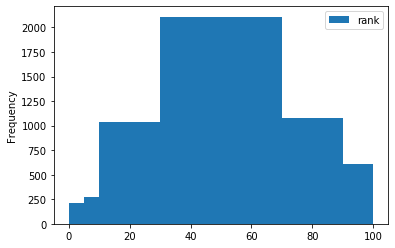

In [33]:
b_b_data[['rank']].plot(kind='hist',bins=[0,5,10,30,70,90,100])
plt.show()
